In [131]:
import pandas as pd
sustainable = pd.read_csv('global-data-on-sustainable-energy (1).csv')

from sklearn.linear_model import LinearRegression
import numpy as np

import matplotlib.pyplot as plt

In [132]:
sustainable

,Entity,Year,Access to electricity (% of population),Access to clean fuels for cooking,Renewable-electricity-generating-capacity-per-capita,Financial flows to developing countries (US $),Renewable energy share in the total final energy consumption (%),Electricity from fossil fuels (TWh),Electricity from nuclear (TWh),Electricity from renewables (TWh),...,Primary energy consumption per capita (kWh/person),Energy intensity level of primary energy (MJ/$2017 PPP GDP),Value_co2_emissions_kt_by_country,Renewables (% equivalent primary energy),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land Area(Km2),Latitude,Longitude
0,Afghanistan,2000,1.613591,6.2,9.22,20000.0,44.99,0.16,0.0,0.31,...,302.59482,1.64,760.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
1,Afghanistan,2001,4.074574,7.2,8.86,130000.0,45.60,0.09,0.0,0.50,...,236.89185,1.74,730.000000,NaN,NaN,NaN,60,652230.0,33.939110,67.709953
2,Afghanistan,2002,9.409158,8.2,8.47,3950000.0,37.83,0.13,0.0,0.56,...,210.86215,1.40,1029.999971,NaN,NaN,179.426579,60,652230.0,33.939110,67.709953
3,Afghanistan,2003,14.738506,9.5,8.09,25970000.0,36.66,0.31,0.0,0.63,...,229.96822,1.40,1220.000029,NaN,8.832278,190.683814,60,652230.0,33.939110,67.709953
4,Afghanistan,2004,20.064968,10.9,7.75,NaN,44.24,0.33,0.0,0.56,...,204.23125,1.20,1029.999971,NaN,1.414118,211.382074,60,652230.0,33.939110,67.709953
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,42.561730,29.8,62.88,30000.0,81.90,3.50,0.0,3.32,...,3227.68020,10.00,11020.000460,NaN,0.755869,1464.588957,38,390757.0,-19.015438,29.154857
3645,Zimbabwe,2017,44.178635,29.8,62.33,5570000.0,82.46,3.05,0.0,4.30,...,3068.01150,9.51,10340.000150,NaN,4.709492,1235.189032,38,390757.0,-19.015438,29.154857
3646,Zimbabwe,2018,45.572647,29.9,82.53,10000.0,80.23,3.73,0.0,5.46,...,3441.98580,9.83,12380.000110,NaN,4.824211,1254.642265,38,390757.0,-19.015438,29.154857
3647,Zimbabwe,2019,46.781475,30.1,81.40,250000.0,81.50,3.66,0.0,4.58,...,3003.65530,10.47,11760.000230,NaN,-6.144236,1316.740657,38,390757.0,-19.015438,29.154857


In [133]:
sustainable_drop = ['Access to clean fuels for cooking',"Electricity from nuclear (TWh)","Energy intensity level of primary energy (MJ/$2017 PPP GDP)","Value_co2_emissions_kt_by_country","Renewables (% equivalent primary energy)",'Latitude','Longitude']
sustainable = sustainable.drop(sustainable_drop, axis=1)

In [62]:
sustainable.columns

Index(['Entity', 'Year', 'Access to electricity (% of population)',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial flows to developing countries (US $)',
       'Renewable energy share in the total final energy consumption (%)',
       'Electricity from fossil fuels (TWh)',
       'Electricity from renewables (TWh)',
       'Low-carbon electricity (% electricity)',
       'Primary energy consumption per capita (kWh/person)', 'gdp_growth',
       'gdp_per_capita', 'Density\n(P/Km2)', 'Land Area(Km2)'],
      dtype='object')

In [134]:
sustainable.columns = sustainable.columns.str.replace(' ', '_')

In [69]:
sustainable.head(25)

,Entity,Year,Access_to_electricity_(%_of_population),Renewable-electricity-generating-capacity-per-capita,Financial_flows_to_developing_countries_(US_$),Renewable_energy_share_in_the_total_final_energy_consumption_(%),Electricity_from_fossil_fuels_(TWh),Electricity_from_renewables_(TWh),Low-carbon_electricity_(%_electricity),Primary_energy_consumption_per_capita_(kWh/person),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land_Area(Km2)
0,Afghanistan,2000,2.0,9.22,20000.0,44.99,0.16,0.31,65.957440,302.59482,NaN,NaN,60,652230.0
1,Afghanistan,2001,4.0,8.86,130000.0,45.60,0.09,0.50,84.745766,236.89185,NaN,NaN,60,652230.0
2,Afghanistan,2002,9.0,8.47,3950000.0,37.83,0.13,0.56,81.159424,210.86215,NaN,179.426579,60,652230.0
3,Afghanistan,2003,15.0,8.09,25970000.0,36.66,0.31,0.63,67.021280,229.96822,8.832278,190.683814,60,652230.0
4,Afghanistan,2004,20.0,7.75,NaN,44.24,0.33,0.56,62.921350,204.23125,1.414118,211.382074,60,652230.0
5,Afghanistan,2005,25.0,7.51,9830000.0,33.88,0.34,0.59,63.440857,252.06912,11.229715,242.031313,60,652230.0
6,Afghanistan,2006,31.0,7.40,10620000.0,31.89,0.20,0.64,76.190475,304.42090,5.357403,263.733602,60,652230.0
7,Afghanistan,2007,36.0,7.25,15750000.0,28.78,0.20,0.75,78.947370,354.27990,13.826320,359.693158,60,652230.0
8,Afghanistan,2008,42.0,7.49,16170000.0,21.17,0.19,0.54,73.972600,607.83350,3.924984,364.663542,60,652230.0
9,Afghanistan,2009,47.0,7.50,9960000.0,16.53,0.16,0.78,82.978720,975.04816,21.390528,437.268740,60,652230.0


In [135]:
sustainable['Access_to_electricity_(%_of_population)'] = sustainable['Access_to_electricity_(%_of_population)'].round()

In [38]:
sustainable

,Entity,Year,Access_to_electricity_(%_of_population),Renewable-electricity-generating-capacity-per-capita,Financial_flows_to_developing_countries_(US_$),Renewable_energy_share_in_the_total_final_energy_consumption_(%),Electricity_from_fossil_fuels_(TWh),Electricity_from_renewables_(TWh),Low-carbon_electricity_(%_electricity),Primary_energy_consumption_per_capita_(kWh/person),gdp_growth,gdp_per_capita,Density\n(P/Km2),Land_Area(Km2)
0,Afghanistan,2000,2.0,9.22,20000.0,44.99,0.16,0.31,65.957440,302.59482,NaN,NaN,60,652230.0
1,Afghanistan,2001,4.0,8.86,130000.0,45.60,0.09,0.50,84.745766,236.89185,NaN,NaN,60,652230.0
2,Afghanistan,2002,9.0,8.47,3950000.0,37.83,0.13,0.56,81.159424,210.86215,NaN,179.426579,60,652230.0
3,Afghanistan,2003,15.0,8.09,25970000.0,36.66,0.31,0.63,67.021280,229.96822,8.832278,190.683814,60,652230.0
4,Afghanistan,2004,20.0,7.75,NaN,44.24,0.33,0.56,62.921350,204.23125,1.414118,211.382074,60,652230.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3644,Zimbabwe,2016,43.0,62.88,30000.0,81.90,3.50,3.32,48.680350,3227.68020,0.755869,1464.588957,38,390757.0
3645,Zimbabwe,2017,44.0,62.33,5570000.0,82.46,3.05,4.30,58.503407,3068.01150,4.709492,1235.189032,38,390757.0
3646,Zimbabwe,2018,46.0,82.53,10000.0,80.23,3.73,5.46,59.412407,3441.98580,4.824211,1254.642265,38,390757.0
3647,Zimbabwe,2019,47.0,81.40,250000.0,81.50,3.66,4.58,55.582527,3003.65530,-6.144236,1316.740657,38,390757.0


In [67]:
sustainable.dtypes

Entity                                                               object
Year                                                                  int64
Access_to_electricity_(%_of_population)                             float64
Renewable-electricity-generating-capacity-per-capita                float64
Financial_flows_to_developing_countries_(US_$)                      float64
Renewable_energy_share_in_the_total_final_energy_consumption_(%)    float64
Electricity_from_fossil_fuels_(TWh)                                 float64
Electricity_from_renewables_(TWh)                                   float64
Low-carbon_electricity_(%_electricity)                              float64
Primary_energy_consumption_per_capita_(kWh/person)                  float64
gdp_growth                                                          float64
gdp_per_capita                                                      float64
Density\n(P/Km2)                                                     object
Land_Area(Km

In [136]:
sustainable.rename(columns={r'Density\n(P/Km2)': 'Density'}, inplace=True)

In [137]:
pr_data = sustainable[sustainable['Entity'] == 'Puerto Rico'] 
pr_data

,Entity,Year,Access_to_electricity_(%_of_population),Renewable-electricity-generating-capacity-per-capita,Financial_flows_to_developing_countries_(US_$),Renewable_energy_share_in_the_total_final_energy_consumption_(%),Electricity_from_fossil_fuels_(TWh),Electricity_from_renewables_(TWh),Low-carbon_electricity_(%_electricity),Primary_energy_consumption_per_capita_(kWh/person),gdp_growth,gdp_per_capita,Density,Land_Area(Km2)
2682,Puerto Rico,2000,100.0,27.20,NaN,0.55,21.66,0.15,0.687758,33807.605,3.271965,16192.12697,368,9104.0
2683,Puerto Rico,2001,100.0,27.19,NaN,0.54,22.17,0.13,0.582960,36749.920,6.313472,18123.19870,368,9104.0
2684,Puerto Rico,2002,100.0,27.29,NaN,0.50,23.06,0.11,0.474752,37742.360,0.916459,18731.45939,368,9104.0
2685,Puerto Rico,2003,100.0,27.37,NaN,0.50,23.83,0.10,0.417885,39338.190,0.053420,19557.12025,368,9104.0
2686,Puerto Rico,2004,100.0,27.40,NaN,0.50,23.99,0.14,0.580191,40723.620,8.748677,20988.99233,368,9104.0
2687,Puerto Rico,2005,100.0,38.00,NaN,0.56,24.82,0.14,0.560897,39564.490,-1.986939,21959.32270,368,9104.0
2688,Puerto Rico,2006,100.0,39.19,NaN,0.48,23.69,0.14,0.587495,36062.957,-1.409414,22935.94116,368,9104.0
2689,Puerto Rico,2007,100.0,45.35,NaN,0.49,22.14,0.16,0.717489,34952.594,-1.162807,23664.88235,368,9104.0
2690,Puerto Rico,2008,100.0,43.24,NaN,0.51,20.76,0.16,0.764818,32875.305,-1.844134,24898.33459,368,9104.0
2691,Puerto Rico,2009,100.0,44.43,NaN,0.52,20.53,0.17,0.821256,30928.209,-1.952425,25768.72589,368,9104.0


In [158]:
pr_data['Rate_of_Change'] = sustainable['Electricity_from_renewables_(TWh)'].diff()
sum_change = pr_data['Rate_of_Change'].sum()
years = pr_data['Year'].count()
average_rate_of_change = sum_change/years
average_rate_of_change

C:\Users\verus\AppData\Local\Temp\ipykernel_14988\3175056794.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pr_data['Rate_of_Change'] = sustainable['Electricity_from_renewables_(TWh)'].diff()


-1.4114285714285715

In [156]:
pr_data['Year'].count()

21

In [152]:
X = pr_data['Year'].values.reshape(-1, 1) 
y = pr_data['Low-carbon_electricity_(%_electricity)'].values
model = LinearRegression()
model.fit(X, y)
year = 2025
X_predict = np.array([[year]])
y_predict = model.predict(X_predict)
print(f"Predicted renewable electricity percentage for Puerto Rico in {year}: {y_predict[0]:.2f}%")

Predicted renewable electricity percentage for Puerto Rico in 2025: 2.70%


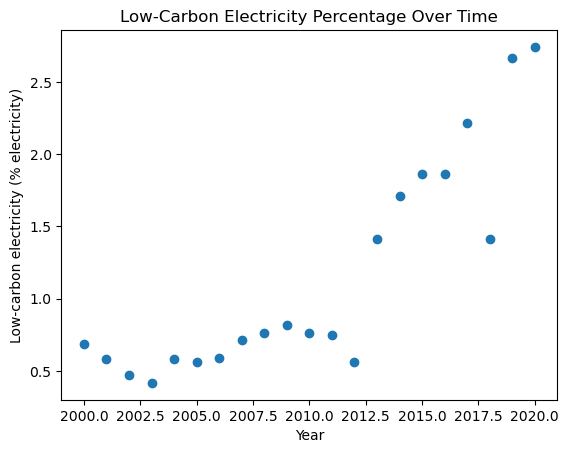

In [153]:
plt.scatter(pr_data['Year'], pr_data['Low-carbon_electricity_(%_electricity)'])

plt.title('Low-Carbon Electricity Percentage Over Time')
plt.xlabel('Year')
plt.ylabel('Low-carbon electricity (% electricity)')
plt.show()

In [95]:
sustainable.columns

Index(['Entity', 'Year', 'Access_to_electricity_(%_of_population)',
       'Renewable-electricity-generating-capacity-per-capita',
       'Financial_flows_to_developing_countries_(US_$)',
       'Renewable_energy_share_in_the_total_final_energy_consumption_(%)',
       'Electricity_from_fossil_fuels_(TWh)',
       'Electricity_from_renewables_(TWh)',
       'Low-carbon_electricity_(%_electricity)',
       'Primary_energy_consumption_per_capita_(kWh/person)', 'gdp_growth',
       'gdp_per_capita', 'Density', 'Land_Area(Km2)'],
      dtype='object')

In [104]:
def similar_PR(sustainable, column = "Density", target_value = 368, tolerance=50):
    """filter will focus on countries that are similar in density to Puerto Rico"""
    sustainable["Density"] = pd.to_numeric(sustainable["Density"], errors='coerce')
    lower_bound = target_value - tolerance
    upper_bound = target_value + tolerance
    
    filtered_sustainable = sustainable[(sustainable["Density"] >= lower_bound) & (sustainable["Density"] <= upper_bound)]
    return filtered_sustainable


In [105]:
filtered_sustainable = similar_PR(sustainable)
filtered_sustainable

,Entity,Year,Access_to_electricity_(%_of_population),Renewable-electricity-generating-capacity-per-capita,Financial_flows_to_developing_countries_(US_$),Renewable_energy_share_in_the_total_final_energy_consumption_(%),Electricity_from_fossil_fuels_(TWh),Electricity_from_renewables_(TWh),Low-carbon_electricity_(%_electricity),Primary_energy_consumption_per_capita_(kWh/person),gdp_growth,gdp_per_capita,Density,Land_Area(Km2)
336,Belgium,2000,100.0,NaN,NaN,1.44,33.58,1.05,59.439545,72420.410,3.716679,23041.534730,383.0,30528.0
337,Belgium,2001,100.0,NaN,NaN,1.58,31.20,1.08,60.320490,71475.500,1.099619,22995.157520,383.0,30528.0
338,Belgium,2002,100.0,NaN,NaN,1.68,32.44,1.14,59.920930,70828.990,1.706885,24887.561330,383.0,30528.0
339,Belgium,2003,100.0,NaN,NaN,1.89,34.99,1.20,58.130910,73221.560,1.037983,30587.668410,383.0,30528.0
340,Belgium,2004,100.0,NaN,NaN,2.02,34.11,1.50,58.863968,73126.234,3.571204,35364.375330,383.0,30528.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3413,Tuvalu,2016,97.0,197.83,NaN,9.46,NaN,NaN,NaN,0.000,3.034723,3253.899536,393.0,26.0
3414,Tuvalu,2017,99.0,195.95,NaN,8.74,NaN,NaN,NaN,0.000,4.094018,3574.065288,393.0,26.0
3415,Tuvalu,2018,99.0,194.52,390000.0,8.32,NaN,NaN,NaN,0.000,2.500000,3701.709255,393.0,26.0
3416,Tuvalu,2019,100.0,192.02,6160000.0,8.20,NaN,NaN,NaN,0.000,9.756098,4055.895610,393.0,26.0


In [111]:
filtered_sustainable['Entity'].value_counts()

Entity
Belgium        21
Grenada        21
Haiti          21
Israel         21
Japan          21
Philippines    21
Puerto Rico    21
Sri Lanka      21
Tuvalu         21
Name: count, dtype: int64